# Basis Pursuit via ADMM

We are given the measurements $b = Ax $. 

We solve the problem:

$$
\tag{BP}
{\min}_{x} \|x\|_{1} \; \text{s.t.} \, A x = b
$$

We will work with a sensing matrix $A$ of size $M \times N$ which consists of orthonormal rows.

In [1]:
%load_ext autoreload
%autoreload 2
from jax.config import config
config.update("jax_enable_x64", True)

In [2]:
from jax import jit
import jax.numpy as jnp
import numpy as np
np.set_printoptions(precision=6)
from jax.numpy.linalg import norm

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import cr.sparse as crs
import cr.sparse.dict as crdict
import cr.sparse.data as crdata
from cr.sparse import lop
from cr.sparse.cvx.adm import yall1

In [5]:
# Problem size
M = 2000
N = 20000
K = 200

In [6]:
# Dictionary Setup
A = crdict.random_orthonormal_rows(crs.KEYS[0],M, N)

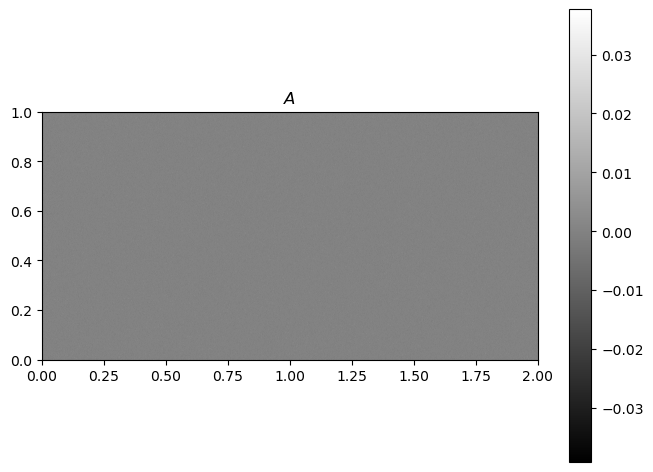

In [7]:
fig=plt.figure(figsize=(8,6), dpi= 100, facecolor='w', edgecolor='k')
plt.imshow(A, extent=[0, 2, 0, 1])
plt.gray()
plt.colorbar()
plt.title(r'$A$');

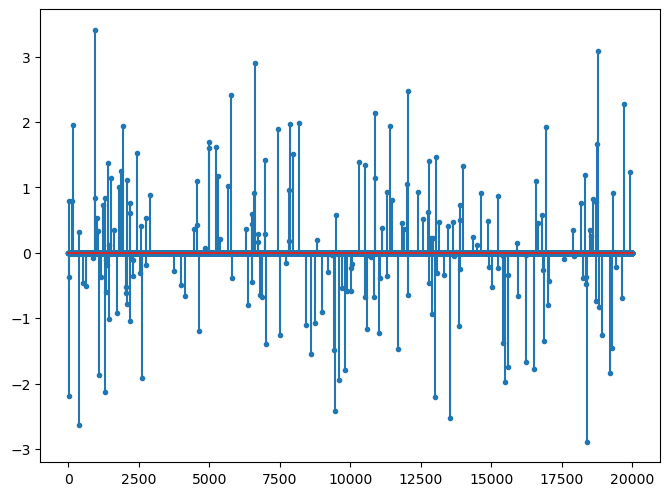

In [8]:
x, omega = crdata.sparse_normal_representations(crs.KEYS[1], N, K)
fig=plt.figure(figsize=(8,6), dpi= 100, facecolor='w', edgecolor='k')
plt.stem(x, markerfmt='.');

In [9]:
# Convert A into a linear operator
T = lop.real_matrix(A)
T = lop.jit(T)

In [10]:
# Compute the measurements
b0 = T.times(x)

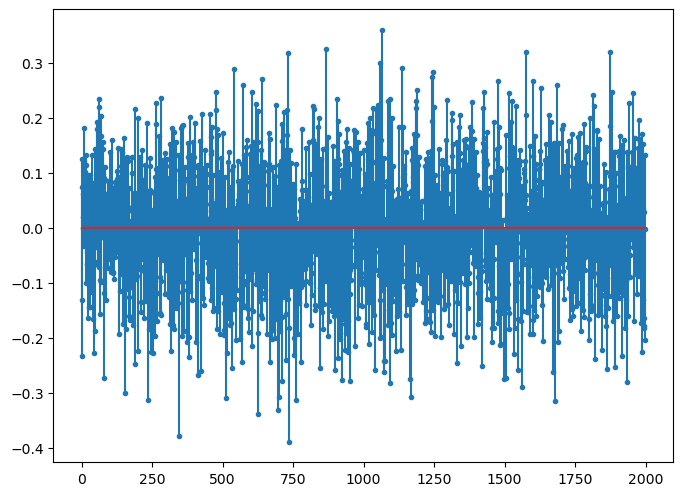

In [11]:
fig=plt.figure(figsize=(8,6), dpi= 100, facecolor='w', edgecolor='k')
plt.stem(b0, markerfmt='.');

In [12]:
sol = yall1.solve(T, b0)

In [13]:
int(sol.iterations), int(sol.n_times), int(sol.n_trans)

(58, 117, 60)

In [14]:
norm(sol.x-x)/norm(x)

DeviceArray(0.016301, dtype=float64)

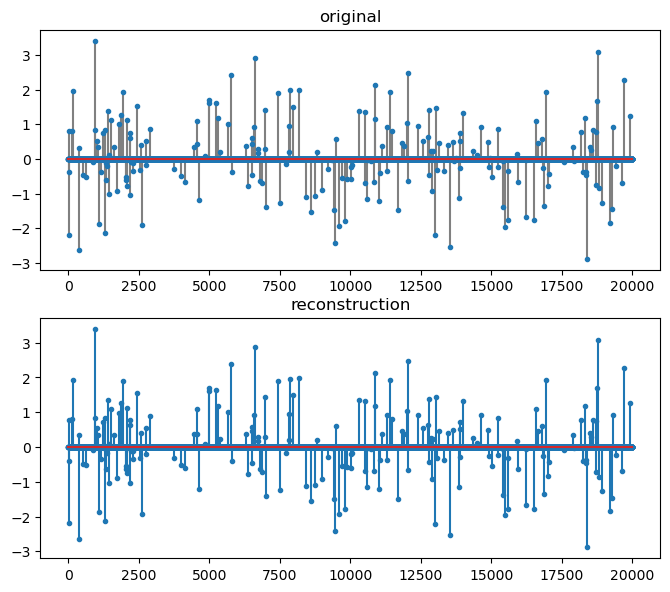

In [15]:
fig=plt.figure(figsize=(8,7), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(211)
plt.title('original')
plt.stem(x, markerfmt='.', linefmt='gray');
plt.subplot(212)
plt.stem(sol.x, markerfmt='.');
plt.title('reconstruction');

In [16]:
%timeit yall1.solve(T, b0).x.block_until_ready()

445 ms ± 1.77 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [17]:
b, x0, z0, w, b_max, n_times, n_trans = yall1.bp_setup(T, b0)
state = yall1.solve_bp_jit(T, b, x0, z0, w, nonneg=False, gamma=1., tolerance=5e-3, max_iters=9999)
sol = yall1.finalize(state, b_max, n_times, n_trans)
int(sol.iterations), int(sol.n_times), int(sol.n_trans)

(58, 117, 60)

In [18]:
norm(sol.x-x)/norm(x)

DeviceArray(0.016301, dtype=float64)

In [19]:
state = yall1.solve_bp_jit(T, b, x0, z0, w, nonneg=False, gamma=1., tolerance=5e-3, max_iters=9999)

In [20]:
%timeit yall1.solve_bp_jit(T, b, x0, z0, w, nonneg=False, gamma=1., tolerance=5e-3, max_iters=500)

443 ms ± 100 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [21]:
jnp.arange(4) @ jnp.ones((4, 4))

DeviceArray([6., 6., 6., 6.], dtype=float64)

In [23]:
1542.85 / 445

3.467078651685393